Convergió en 8388 iteraciones.


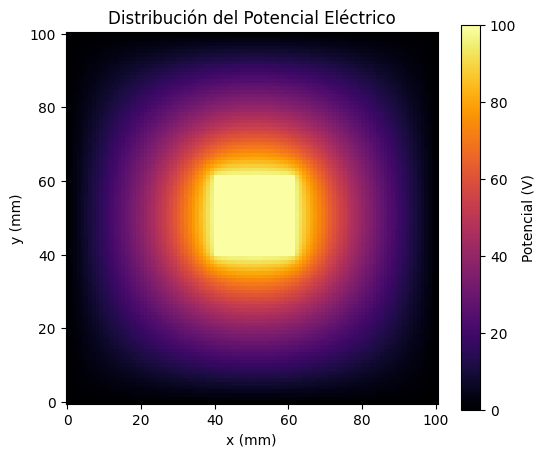

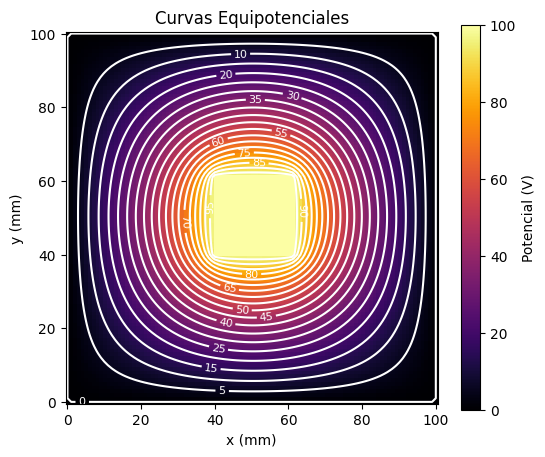

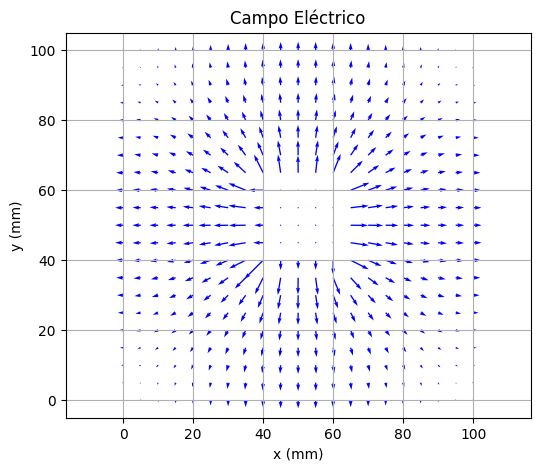

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 101
phi = np.zeros((n, n))

# Condición de frontera
phi[40:62, 40:62] = 100.0

# Método de relajación
tolerance = 1e-6
epsilon = 1
iteration = 0

while epsilon > tolerance:
    epsilon = 0
    new_phi = phi.copy()
    for i in range(1, n - 1):
        for j in range(1, n - 1):
            if not (40 <= i <= 61 and 40 <= j <= 61):  # No actualizar dentro del cuadrado
                new_value = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])
                diff = abs(new_value - phi[i, j])
                if diff > epsilon:
                    epsilon = diff
                new_phi[i, j] = new_value
    phi = new_phi
    iteration += 1

print(f"Convergió en {iteration} iteraciones.")

# Gráfica del potencial
plt.figure(figsize=(6, 5))
plt.imshow(phi, cmap='inferno', origin='lower')
plt.colorbar(label='Potencial (V)')
plt.title('Distribución del Potencial Eléctrico')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.grid(False)
plt.show()

# Gráfica curvas equipotenciales
plt.figure(figsize=(6, 5))
x = np.arange(n)
y = np.arange(n)
X, Y = np.meshgrid(x, y)
contours = plt.contour(X, Y, phi, levels=20, colors='white')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(phi, cmap='inferno', origin='lower')
plt.colorbar(label='Potencial (V)')
plt.title('Curvas Equipotenciales')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.grid(False)
plt.show()


Ey, Ex = np.gradient(-phi)
skip = 5
x = np.arange(0, n, skip)
y = np.arange(0, n, skip)
X, Y = np.meshgrid(x, y)
Ex_sub = Ex[::skip, ::skip]
Ey_sub = Ey[::skip, ::skip]

# Gráfica del campo eléctrico
plt.figure(figsize=(6, 5))
plt.quiver(X, Y, Ex_sub, Ey_sub, color='blue', scale=100)
plt.title('Campo Eléctrico')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.axis('equal')
plt.grid(True)
plt.show()
